In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from BSAPR_model_1 import *
import gzip
import os
import requests
from anndata import AnnData
import scanpy as sc
from scipy import stats
import copy
import pickle

# Fig 20

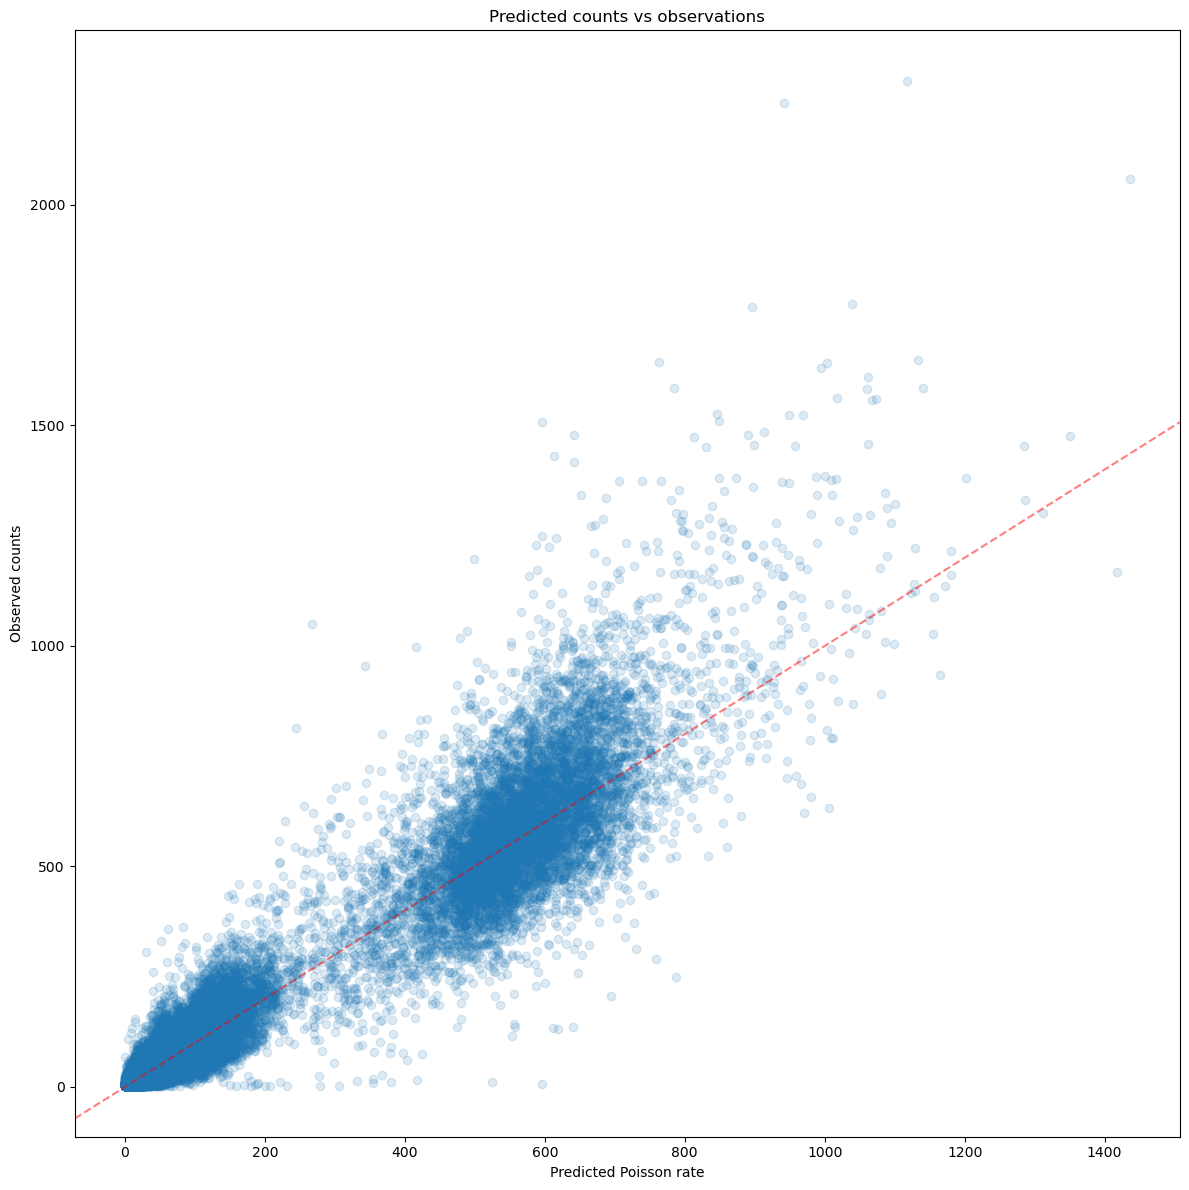

In [2]:
estimated_perturbed_rate = pd.read_csv('./GPerturb_vis_data/LUHMES_ZIP_estimated.csv').to_numpy().ravel()
my_observation = pd.read_csv('./GPerturb_vis_data/LUHMES_ZIP_obs.csv').to_numpy().ravel()

fig2, axes2 = plt.subplots(1, 1)
axes2.scatter(estimated_perturbed_rate, my_observation, alpha=0.15)
axes2.axline((1, 1), slope=1, c='r', linestyle='--', alpha=0.5)
axes2.set_ylabel('Observed counts')
axes2.set_xlabel('Predicted Poisson rate')
axes2.set_title('Predicted counts vs observations')
fig2.set_size_inches(12, 12)
fig2.tight_layout()
plt.savefig('./GPerturb_vis/LUHMES_GPerturb_ZIP_obs_vs_pred.png', dpi=300)

# Fig 21

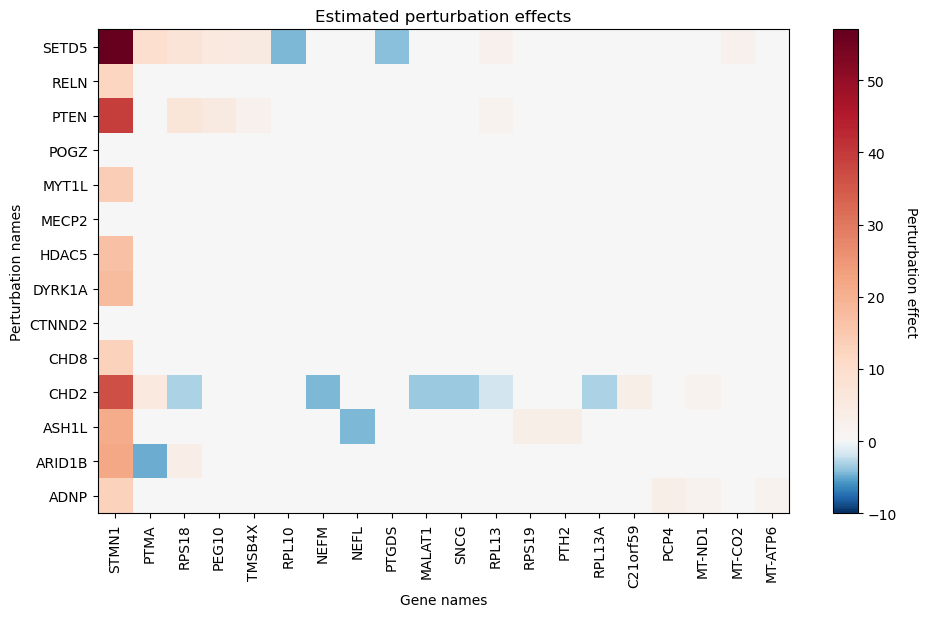

In [3]:
estimated_pert = pd.read_csv('./GPerturb_vis_data/perturb_level_LUHMES_ZIP.csv').to_numpy()
my_gene_name = list(pd.read_csv('./GPerturb_vis_data/top_gene_LUHMES_ZIP.csv').to_numpy().ravel())
my_yticks = list(pd.read_csv('./GPerturb_vis_data/y_ticks_LUHMES_ZIP.csv').to_numpy().ravel())

fig2, axes2 = plt.subplots(1, 1)
# plt.set_cmap('RdBu')
negatives = -10
positives = estimated_pert.max() + 0.1

num_neg_colors = int(256 / (positives - negatives) * (-negatives))
num_pos_colors = 256 - num_neg_colors
cmap_BuRd = plt.cm.RdBu_r
colors_2neg_4pos = [cmap_BuRd(0.5*c/num_neg_colors) for c in range(num_neg_colors)] +\
                   [cmap_BuRd(1-0.5*c/num_pos_colors) for c in range(num_pos_colors)][::-1]
cmap_2neg_4pos = colors.LinearSegmentedColormap.from_list('cmap_2neg_4pos', colors_2neg_4pos, N=256)
#
# x, y = np.meshgrid(np.arange(estimated_pert_LUHMES.shape[1]), np.arange(estimated_pert_LUHMES.shape[0]))
# im = axes2[0].pcolormesh(x,y,estimated_pert_LUHMES, norm=norm, cmap="RdBu_r")
im = axes2.imshow(estimated_pert[1:], cmap=cmap_2neg_4pos, vmin=negatives, vmax=positives)
axes2.set_xticks(np.arange(len(my_gene_name)), my_gene_name, rotation=90)
axes2.set_yticks(np.arange(len(my_yticks)-1), my_yticks[1:])
axes2.set_ylabel('Perturbation names')
axes2.set_xlabel('Gene names')
axes2.set_title('Estimated perturbation effects')
cbar = fig2.colorbar(im, ax=axes2)
cbar.ax.set_ylabel('Perturbation effect', rotation=270, labelpad=15)
fig2.set_size_inches(10, 6)
fig2.tight_layout()
plt.savefig('./GPerturb_vis/LUHMES_GPerturb_ZIP_heatmap_3', dpi=300)

# Fig 22

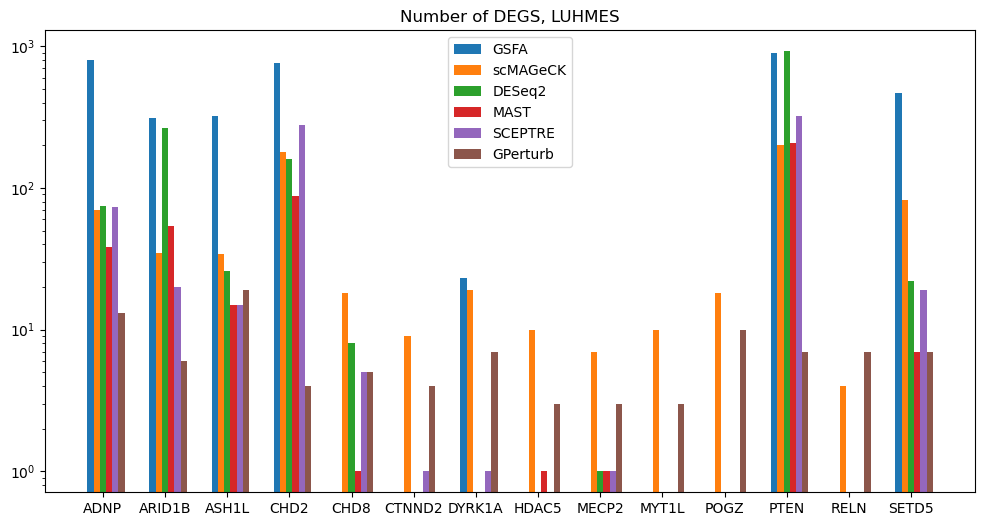

In [4]:
deg_LUHMES = pd.read_csv('./GPerturb_vis_data/LUHMES_histo.csv', index_col=0)
deg_LUHMES_num = deg_LUHMES.drop('Perturbation', axis=1).to_numpy()
deg_LUHMES.drop('Perturbation', axis=1).to_numpy()
fig, ax = plt.subplots(1,1)
x = np.arange(14)
multiplier = 0
width = 1/10
for i in range(6):
    ax.bar(x + multiplier*width, deg_LUHMES_num[:, i], width, label=deg_LUHMES.columns[i+1])
    multiplier += 1
ax.legend()
ax.set_xticks(ticks=x + 2*width, labels=deg_LUHMES.Perturbation.to_numpy())
ax.set_yscale('log')
ax.set_title('Number of DEGS, LUHMES')
fig.set_size_inches(12, 6)
fig.savefig('./GPerturb_vis/LUHMES_degs_3.png', dpi=300)

# Fig 23

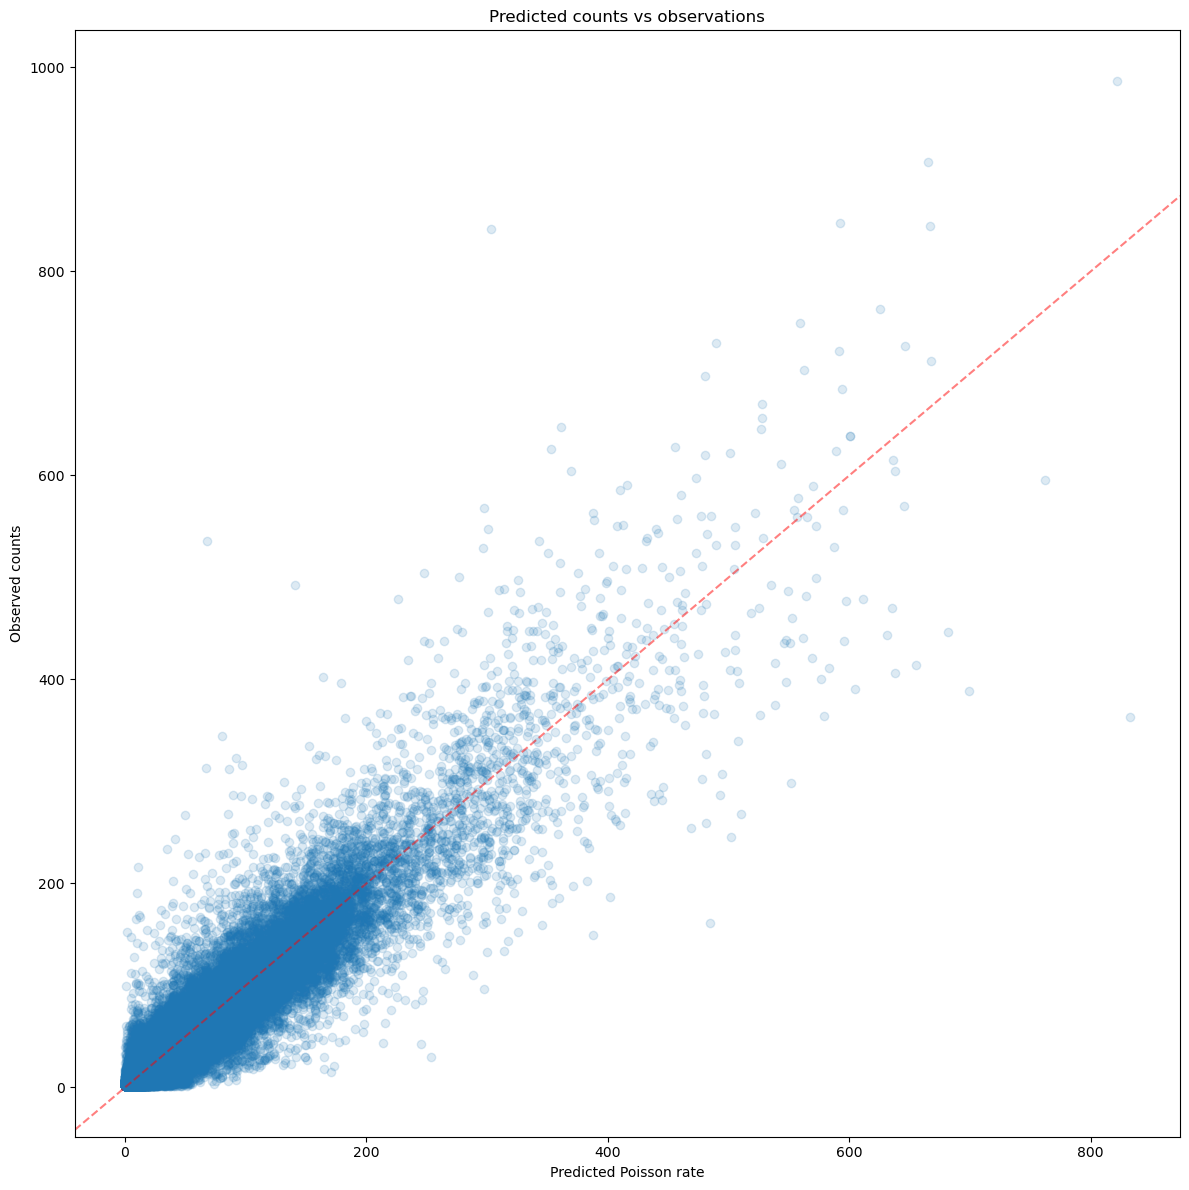

In [5]:
non_zero_est = pd.read_csv('./GPerturb_vis_data/TCells_ZIP_non_zero_est.csv').to_numpy().ravel()
non_zero_obs = pd.read_csv('./GPerturb_vis_data/TCells_ZIP_non_zero_obs.csv').to_numpy().ravel()

fig2, axes2 = plt.subplots(1, 1)
axes2.scatter(non_zero_est, non_zero_obs, alpha=0.15)
axes2.axline((1, 1), slope=1, c='r', linestyle='--', alpha=0.5)
axes2.set_ylabel('Observed counts')
axes2.set_xlabel('Predicted Poisson rate')
axes2.set_title('Predicted counts vs observations')
fig2.set_size_inches(12, 12)
fig2.tight_layout()
plt.savefig('./GPerturb_vis/TCells_GPerturb_ZIP_obs_vs_pred.png', dpi=300)

# Fig 24

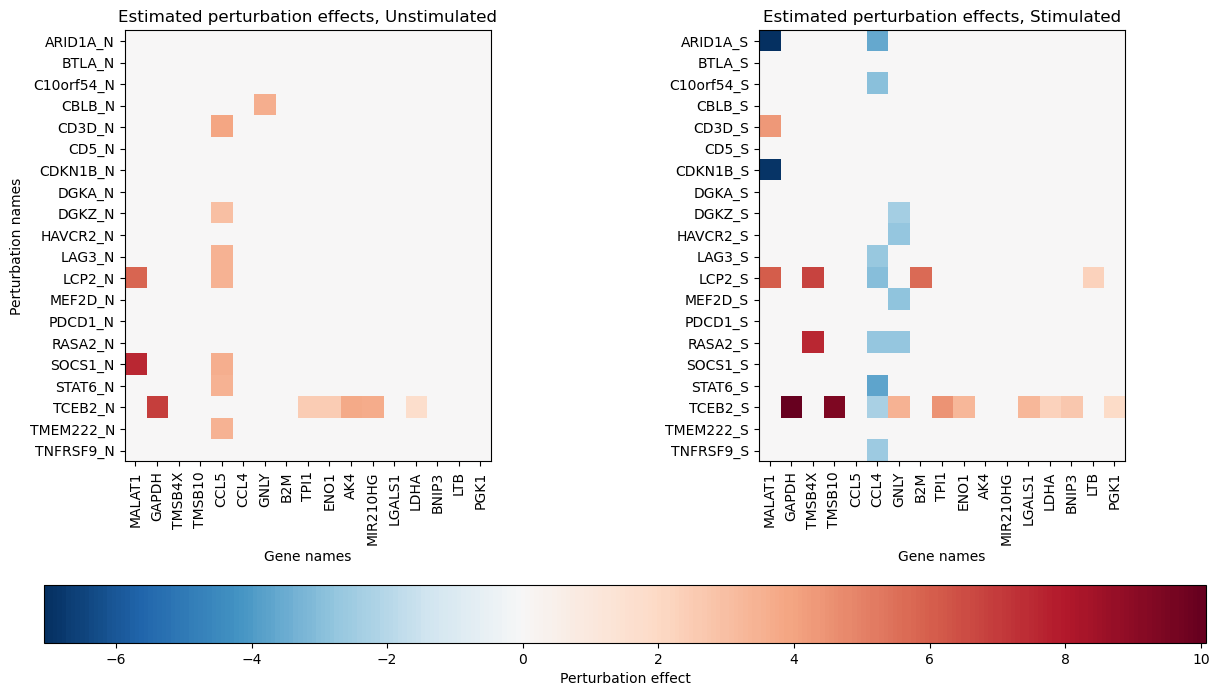

In [6]:
estimated_pert = pd.read_csv('./GPerturb_vis_data/TCell_ZIP_pert_level.csv').to_numpy()
my_gene_name = list(pd.read_csv('./GPerturb_vis_data/TCell_ZIP_my_gene_name.csv').to_numpy().ravel())
my_yticks = list(pd.read_csv('./GPerturb_vis_data/TCell_ZIP_my_yticks.csv').to_numpy().ravel())

fig2, axes2 = plt.subplots(1, 2)
negatives = np.min(estimated_pert)
positives = np.max(estimated_pert)
num_neg_colors = int(256 / (positives - negatives) * (-negatives))
num_pos_colors = 256 - num_neg_colors
cmap_BuRd = plt.cm.RdBu_r
colors_2neg_4pos = [cmap_BuRd(0.5*c/num_neg_colors) for c in range(num_neg_colors)] +\
                   [cmap_BuRd(1-0.5*c/num_pos_colors) for c in range(num_pos_colors)][::-1]
cmap_2neg_4pos_1 = colors.LinearSegmentedColormap.from_list('cmap_2neg_4pos', colors_2neg_4pos, N=256)
cmap_2neg_4pos_2 = colors.LinearSegmentedColormap.from_list('cmap_2neg_4pos', colors_2neg_4pos, N=256)

im = axes2[0].imshow(estimated_pert[::2][:, :30], vmin=negatives, vmax = positives, cmap=cmap_2neg_4pos_1)
# im = axes2.imshow(estimated_pert_LUHMES, norm=norm, cmap='RdBu_r')
axes2[0].set_xticks(np.arange(len(my_gene_name[:30])), my_gene_name[:30], rotation=90)
axes2[0].set_yticks(np.arange(len(my_yticks[::2])), my_yticks[::2])
axes2[0].set_ylabel('Perturbation names')
axes2[0].set_xlabel('Gene names')
axes2[0].set_title('Estimated perturbation effects, Unstimulated')
axes2[0].set_aspect('equal')

im = axes2[1].imshow(estimated_pert[1::2][:, :30], vmin=negatives, vmax = positives, cmap=cmap_2neg_4pos_2)
axes2[1].set_xticks(np.arange(len(my_gene_name[:30])), my_gene_name[:30], rotation=90)
axes2[1].set_yticks(np.arange(len(my_yticks[1::2])), my_yticks[1::2])
axes2[1].set_ylabel('')
axes2[1].set_xlabel('Gene names')
axes2[1].set_title('Estimated perturbation effects, Stimulated')
axes2[1].set_aspect('equal')
cbar = fig2.colorbar(im, ax=axes2, orientation="horizontal", fraction=.1, pad=0.2)
cbar.ax.set_xlabel('Perturbation effect')
fig2.set_size_inches(15, 8)
plt.savefig('./GPerturb_vis/GPerturb_heatmap_TCells_ZIP_4.png', dpi=300)

# Fig 25

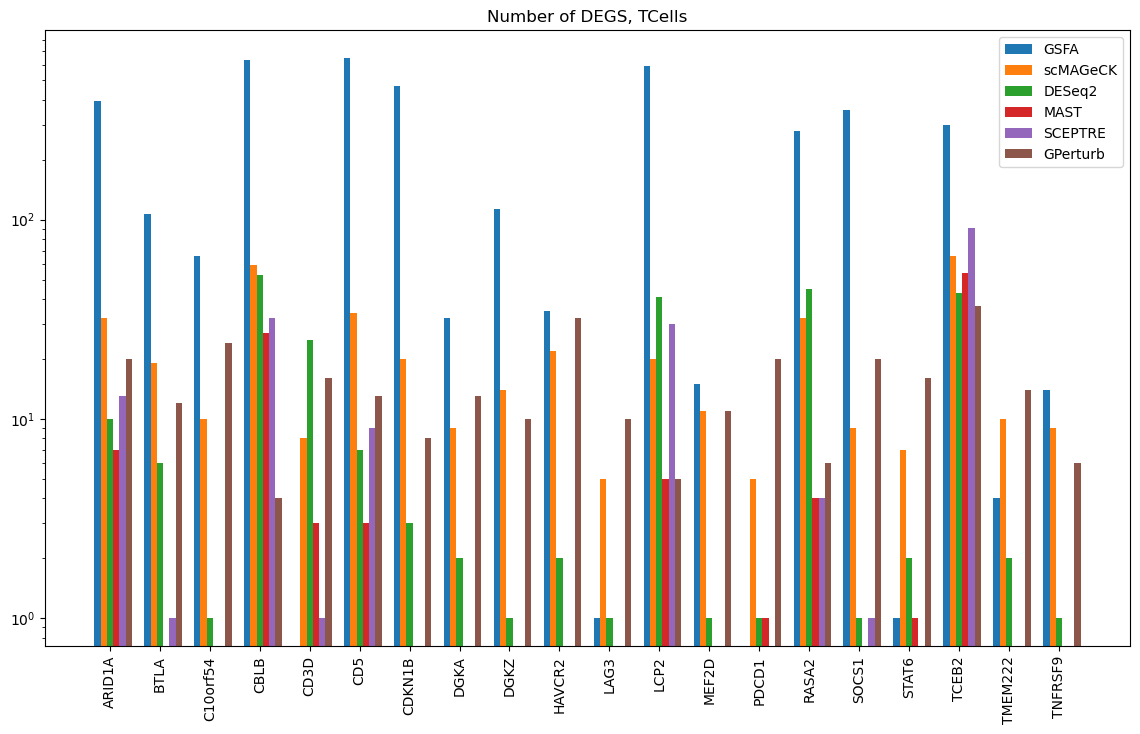

In [7]:
deg_TCells = pd.read_csv('./GPerturb_vis_data/TCells_histo.csv')
deg_TCells_num = deg_TCells.drop('Perturbation', axis=1).to_numpy()
deg_TCells.drop('Perturbation', axis=1).to_numpy()
fig, ax = plt.subplots(1,1)
x = np.arange(20)
multiplier = 0
width = 1/8
for i in range(6):
    ax.bar(x + multiplier*width, deg_TCells_num[:, i], width, label=deg_TCells.columns[i+1])
    multiplier += 1
ax.legend()
ax.set_xticks(ticks=x + 2*width, labels=deg_TCells.Perturbation.to_numpy(), rotation=90)
ax.set_yscale('log')
ax.set_title('Number of DEGS, TCells')
fig.set_size_inches(14, 8)
fig.savefig('./GPerturb_vis/TCells_degs_3.png', dpi=300)

# Fig 26

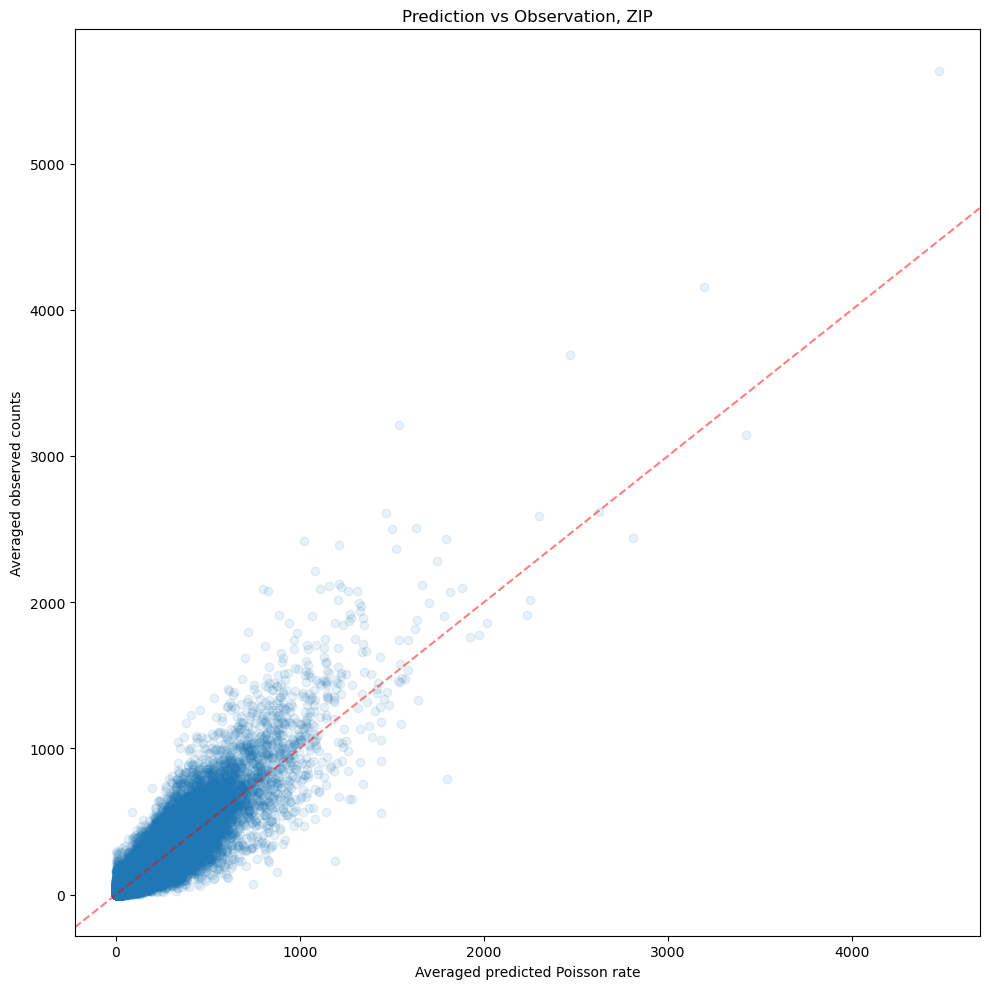

In [8]:
estimated_pert = pd.read_csv('./GPerturb_vis_data/Sciplex2_ZIP_est.csv').to_numpy().ravel()
my_obs = pd.read_csv('./GPerturb_vis_data/Sciplex2_ZIP_obs.csv').to_numpy().ravel()

fig, axs = plt.subplots(1, 1)
axs.scatter(estimated_pert, my_obs, alpha=0.1)
axs.axline((1, 1), slope=1, c='r', alpha=0.5, linestyle='--')
axs.set_xlabel('Averaged predicted Poisson rate')
axs.set_ylabel('Averaged observed counts')
axs.set_title('Prediction vs Observation, ZIP')
fig.set_size_inches(10, 10)
fig.tight_layout()
plt.savefig('./GPerturb_vis/GPerturb_pred_vs_obs_SciPlex2_ZIP_3.png', dpi=300)

# Fig 27

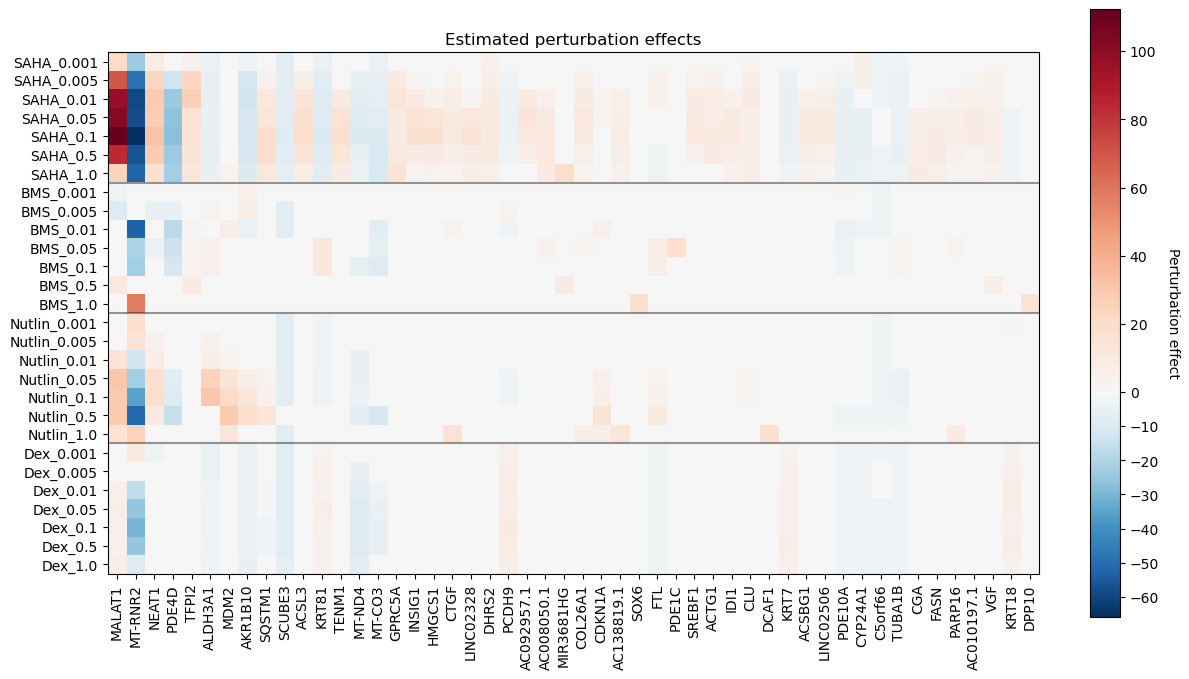

In [9]:
estimated_pert = pd.read_csv('./GPerturb_vis_data/Sciplex2_pert_level_ZIP.csv').to_numpy()
my_gene_name = list(pd.read_csv('./GPerturb_vis_data/Sciplex2_my_gene_name_ZIP.csv').to_numpy().ravel())
my_yticks = list(pd.read_csv('./GPerturb_vis_data/Sciplex2_my_yticks_ZIP.csv').to_numpy().ravel())

fig, ax1 = plt.subplots(1,1)

import matplotlib.colors as colors
negatives = estimated_pert.min()
positives = estimated_pert.max()


num_neg_colors = int(256 / (positives - negatives) * (-negatives))
num_pos_colors = 256 - num_neg_colors
cmap_BuRd = plt.cm.RdBu_r
colors_2neg_4pos = [cmap_BuRd(0.5*c/num_neg_colors) for c in range(num_neg_colors)] +\
[cmap_BuRd(1-0.5*c/num_pos_colors) for c in range(num_pos_colors)][::-1]
cmap_2neg_4pos = colors.LinearSegmentedColormap.from_list('cmap_2neg_4pos', colors_2neg_4pos, N=256)

im = ax1.imshow(estimated_pert[1:], cmap=cmap_2neg_4pos)
for i in [6.5, 13.5, 20.5]:
    ax1.axline((i, i), slope=0, alpha=0.4, c='k')
ax1.set_xticks(np.arange(len(my_gene_name)), my_gene_name, rotation=90)
ax1.set_yticks(np.arange(len(my_yticks)-1), my_yticks[1:])
ax1.set_title('Estimated perturbation effects')
ticks = np.append(np.arange(-60, 0., 10.), np.arange(0, 120, 20.))
cbar = fig.colorbar(im, ax=ax1, ticks=ticks, fraction=0.03)
cbar.ax.set_ylabel('Perturbation effect', rotation=270, labelpad=15)
fig.set_size_inches(12, 8)
fig.tight_layout()
plt.savefig('./GPerturb_vis/GPerturb_heatmap_SciPlex2_ZIP_3.png', dpi=300)

# Fig 28

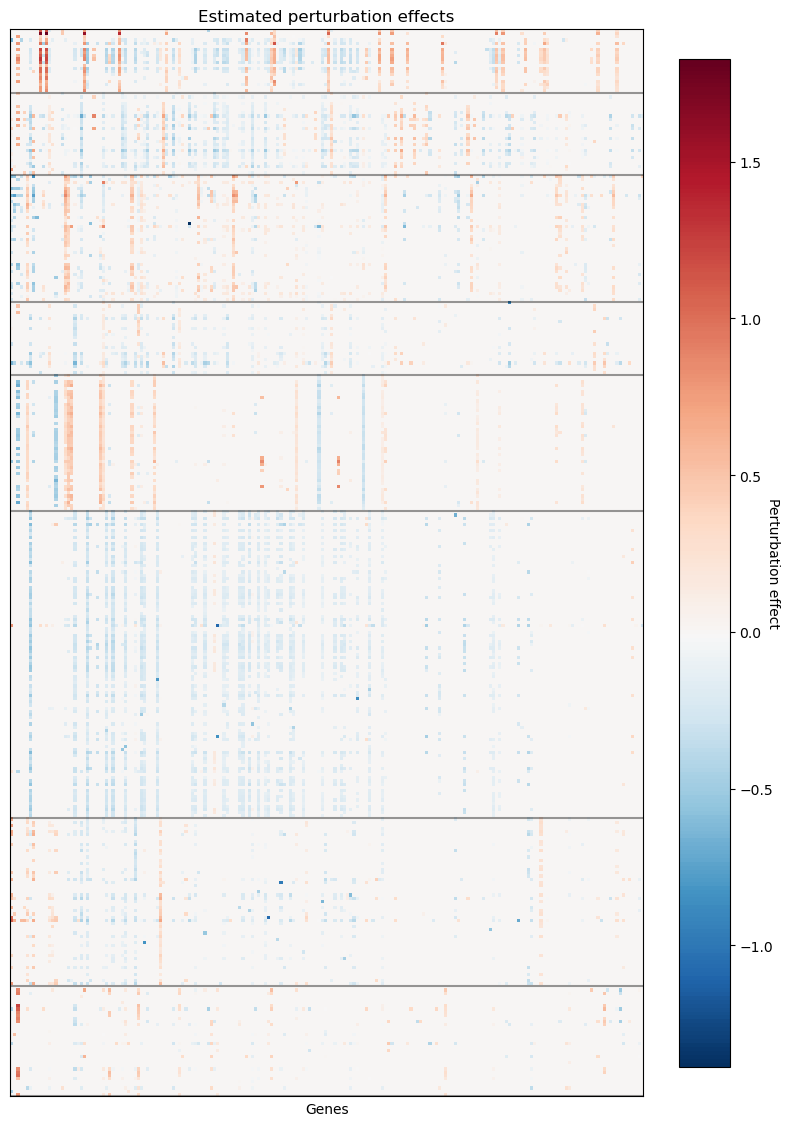

In [10]:
estimated_pert_rep = pd.read_csv('./GPerturb_vis_data/Rep_Gaussian_estimated_pert.csv').to_numpy()
adata = sc.read_h5ad('./GPerturb_vis_data/replogle.h5ad')
adata.obs['n_feature'] = (adata.X > 0).sum(1)

# zip
my_observation = adata.X
gene_name = list(adata.var.gene_name)
my_observation = torch.tensor(my_observation * 1.0, dtype=torch.float)

my_cell_info = adata.obs[['core_adjusted_UMI_count', 'mitopercent', 'n_feature', 'core_scale_factor']]
my_cell_info = torch.tensor(my_cell_info.to_numpy() * 1.0, dtype=torch.float)
my_cell_info[:, 2] = my_cell_info[:, 2] / my_cell_info[:, 0]
my_cell_info[:, 0] = np.log(my_cell_info[:, 0])

pathways = adata.uns['pathways']

my_conditioner = pd.get_dummies(adata.obs['gene'])
my_conditioner = my_conditioner.drop('non-targeting', axis=1)
cond_name = list(my_conditioner.columns)
my_conditioner = torch.tensor(my_conditioner.to_numpy() * 1.0, dtype=torch.float)

unique_conditions = torch.unique(my_conditioner, dim=0)
unique_conditions = unique_conditions.numpy()
my_yticks = ['' for _ in range(unique_conditions.shape[0])]
ref_id = 0
for i in range(unique_conditions.shape[0]):
    if np.all(unique_conditions[i] == 0):
        my_yticks[i] = 'Non Targeting'
        ref_id = i
    else:
        my_yticks[i] = np.array(cond_name)[unique_conditions[i] == 1][0]

pathway_id = {}
for path in pathways:
    pathway_id[path] = [my_yticks.index(i) for i in pathways[path]]
import matplotlib.colors as colors

fig2, axes2 = plt.subplots(1, 1)
# plt.set_cmap('RdBu')
negatives = -1.5
positives = 2

bounds_min = np.linspace(negatives, 0, 129)
bounds_max = np.linspace(0, positives, 129)[1:]
    # the zero is only needed once
    # in total there will be 257 bounds, so 256 bins
bounds = np.concatenate((bounds_min, bounds_max), axis=None)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
#
# x, y = np.meshgrid(np.arange(estimated_pert_LUHMES.shape[1]), np.arange(estimated_pert_LUHMES.shape[0]))
# im = axes2[0].pcolormesh(x,y,estimated_pert_LUHMES, norm=norm, cmap="RdBu_r")


negatives = -1.5
positives = 2
num_neg_colors = int(256 / (positives - negatives) * (-negatives))
num_pos_colors = 256 - num_neg_colors
cmap_BuRd = plt.cm.RdBu_r
colors_2neg_4pos = [cmap_BuRd(0.5*c/num_neg_colors) for c in range(num_neg_colors)] +\
                   [cmap_BuRd(1-0.5*c/num_pos_colors) for c in range(num_pos_colors)][::-1]
cmap_2neg_4pos = colors.LinearSegmentedColormap.from_list('cmap_2neg_4pos', colors_2neg_4pos, N=256)

im = axes2.imshow(estimated_pert_rep, cmap=cmap_2neg_4pos)
# im = axes2.imshow(estimated_pert_LUHMES, norm=norm, cmap='RdBu_r')
# axes2.set_xticks(np.arange(len(my_gene_name_reo)), my_gene_name_reo, rotation=90)
# axes2.set_yticks(np.arange(len(my_yticks_reo)), my_yticks_reo)
axes2.set_xticks([])
axes2.set_yticks([])
axes2.set_ylabel('')
for l in np.cumsum([len(i) for i in pathways.values()]):
    axes2.axline((0., l-0.5), slope=0, alpha=0.4, c='k')
axes2.set_xlabel('Genes')
axes2.set_title('Estimated perturbation effects')
axes2.set_aspect('equal')
# ticks = np.append(np.arange(-1.5, 0, 0.5), np.arange(0, 5.101, 1.7))
# fig2.colorbar(im, ax=axes2, ticks=ticks)
cbar=fig2.colorbar(im, ax=axes2, fraction=0.07)
cbar.ax.set_ylabel('Perturbation effect', rotation=270, labelpad=5)
fig2.set_size_inches(8, 12)
fig2.tight_layout()
plt.savefig('./GPerturb_vis/rep_GPerturb_heatmap_Gaussian.png', dpi=300)

# Fig 29

C:\Users\86304\AppData\Local\anaconda3\envs\work_env\Lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\86304\AppData\Local\anaconda3\envs\work_env\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\86304\AppData\Local\anaconda3\envs\work_env\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


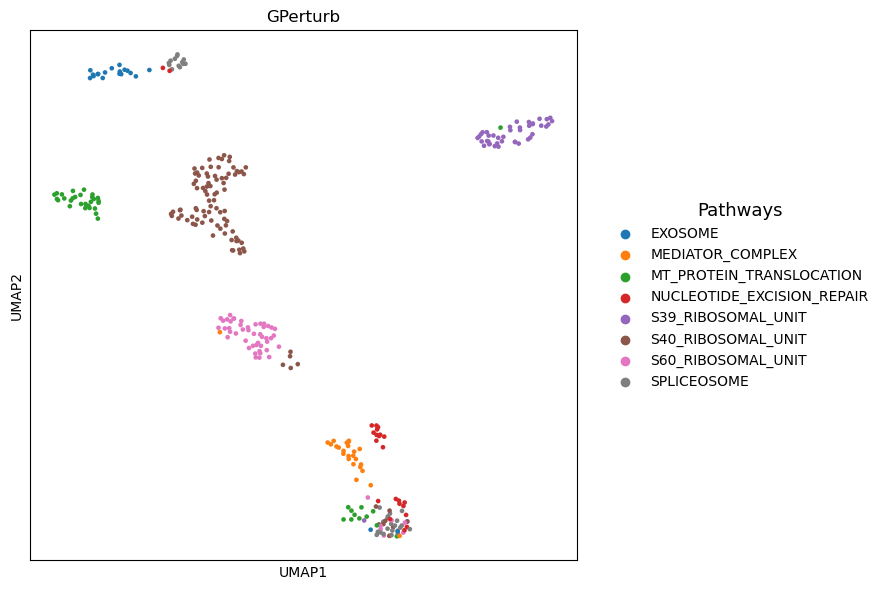

In [11]:
estimated_pert = pd.read_csv('./GPerturb_vis_data/Rep_Gaussian_estimated_pert_full.csv').to_numpy()
top_gene = list(pd.read_csv('./GPerturb_vis_data/Rep_Gaussian_top_gene.csv').to_numpy().ravel())
my_pathway = [None for _ in range(unique_conditions.shape[0])]
for i, name in enumerate(my_yticks):
    for j in pathways:
        if name in pathways[j]:
            my_pathway[i] = j

check_id = [_ is not None for _ in my_pathway]
# check_id = [True for _ in my_pathway]
import anndata
adata_BSAPR = anndata.AnnData(obs = pd.DataFrame(list(np.array(my_pathway)[check_id]), columns=['pathway']), X = estimated_pert[:, top_gene][check_id])
#

fig, ax = plt.subplots(1, 1)

sc.pp.pca(adata_BSAPR, n_comps=199)
sc.pp.neighbors(adata_BSAPR, n_neighbors=11)
sc.tl.umap(adata_BSAPR)
sc.pl.umap(adata_BSAPR, color=['pathway'], s=45, title='GPerturb', ax=ax, show=False)
ax.legend(title='Pathways', title_fontsize=13, frameon=False, bbox_to_anchor=(1.04, 0.5), loc="center left")
fig.legend
fig.set_size_inches(9,6)
fig.tight_layout()
plt.savefig('./GPerturb_vis/UMAP_SAMS_VS_GPerturb_Gaussian_NA_filtered.png', dpi=300)

# Fig 30

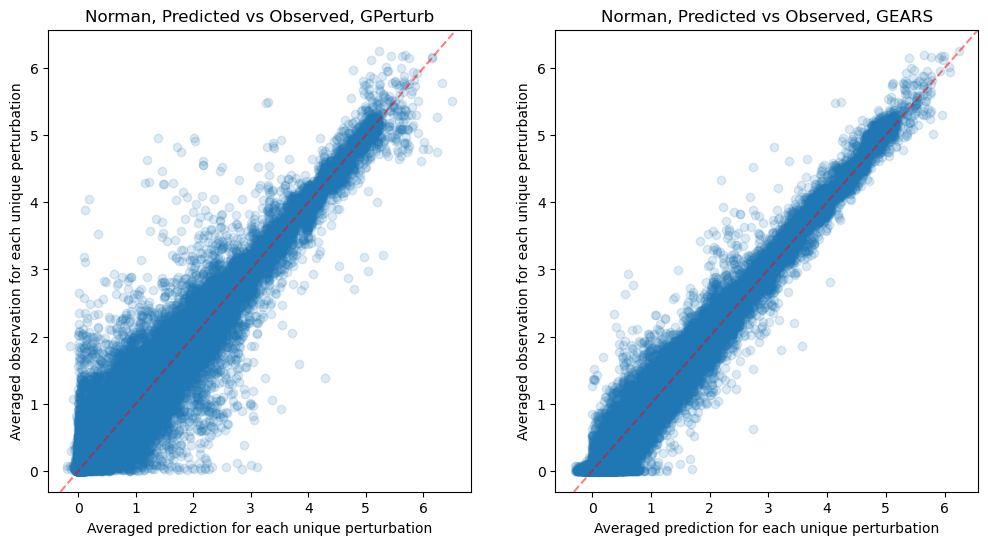

In [12]:
gears_pred = pd.read_csv('./GPerturb_vis_data/Norman_GEARS_pred.csv', index_col=0)
avg_pred_GPerturb = np.load('./GPerturb_vis_data/GPerturb_Norman.npy')
avg_obs = np.load('./GPerturb_vis_data/avg_obs_Norman.npy')

fig, axes = plt.subplots(1, 2)
axes[0].scatter(avg_pred_GPerturb[avg_obs != 0], avg_obs[avg_obs != 0], alpha=0.15)
axes[0].axline((1, 1), slope=1, c='r', alpha=0.5, linestyle='--')
axes[0].set_xlabel('Averaged prediction for each unique perturbation')
axes[0].set_ylabel('Averaged observation for each unique perturbation')
axes[0].set_title('Norman, Predicted vs Observed, GPerturb')

axes[1].scatter(gears_pred.to_numpy().ravel(), avg_obs.ravel(), alpha=0.15)
axes[1].axline((1, 1), slope=1, c='r', alpha=0.5, linestyle='--')
axes[1].set_xlabel('Averaged prediction for each unique perturbation')
axes[1].set_ylabel('Averaged observation for each unique perturbation')
axes[1].set_title('Norman, Predicted vs Observed, GEARS')

fig.set_size_inches(12,6)
plt.savefig('./GPerturb_vis/Norman_GPerturb_vs_GEARS.png', dpi=300)